In [1]:
import pandas as pd 
import networkx as nx 
from tqdm import tqdm 
tqdm.pandas()
import matplotlib.pyplot as plt
from statistics import mean
from tqdm import tqdm 
from datetime import datetime 
import csv 
from utils_graph import *

In [2]:
GC = build_graph_from_csv('../data/conceptnet.en.csv', type='undirected')
GS = build_graph_from_csv('../data/swow.en.csv', type='undirected')

In [13]:
# if u in T.nodes and v in T.nodes and nx.algorithms.shortest_paths.generic.has_path(T, u, v):
u='decide'
v='camping'
path = nx.shortest_path(GS, source=u, target=v)
print(path)
path = nx.shortest_path(GC, source=u, target=v)
print(path)

print(nx.dijkstra_path(G=GS, source=u, target=v))

print([p for p in nx.all_shortest_paths(GS,source=u,target=v)])
print([p for p in nx.all_shortest_paths(GC,source=u,target=v)])

# nx.add_path(G, path)    

['decide', 'site', 'camping']
['decide', 'thinking', 'fun', 'camping']
['decide', 'site', 'camping']
[['decide', 'site', 'camping'], ['decide', 'intention', 'camping']]
[['decide', 'think', 'activity', 'camping'], ['decide', 'judge', 'activity', 'camping'], ['decide', 'rule', 'activity', 'camping'], ['decide', 'action', 'activity', 'camping'], ['decide', 'thought', 'activity', 'camping'], ['decide', 'action', 'intelligent agent activity', 'camping'], ['decide', 'action', 'recreational activity', 'camping'], ['decide', 'thinking', 'fun', 'camping'], ['decide', 'up', 'fire', 'camping']]


In [3]:
# custom_ged=True 
custom_ged=False 
if custom_ged: 
    GED = GraphEditDistance(e_del_cost =1, e_ins_cost=0, n_del_cost=1, n_ins_cost=0)
else:
    GED = GraphEditDistance(e_del_cost =1, e_ins_cost=1, n_del_cost=1, n_ins_cost=1)

def subgraph_info(triples, normalize_size=True):
    '''
    '''
    if len(triples) == 0:
        print("len triples 0")
    # assert len(triples) == 0, "invalid inputs, no triples for graph construction"        

    G = build_graph_from_triples(triples, type='undirected')

    G1 = construct_graph_from_shortest_path(G, GC)
    G2 = construct_graph_from_shortest_path(G, GS)

    avg_deg = average_degree(G)
    avg_deg1 = average_degree(G1)
    avg_deg2 = average_degree(G2)


    density = nx.density(G)
    density1 = nx.density(G1)
    density2 = nx.density(G2)


    ged1 = GED.get_graph_edit_distance(G, G1)
    ged2 = GED.get_graph_edit_distance(G, G2)

    if G1.size() >0 and G2.size()>0:
        ged3 = GED.get_graph_edit_distance(G1, G2)
    else: 
        ged3 = 0

    if G1.size()==0:
        print("G1 size 0")
        avg_deg1, density1 =0, 0 

    if G2.size()==0:
        print("G2 size 0")
        avg_deg2, density2 = 0, 0

    return pd.Series([avg_deg, avg_deg1, avg_deg2, density,  density1,  density2, ged1, ged2, ged3])


In [5]:
def main(path, output_path=None):
    '''
    a) read a csv file and b)build a graph for each triples in each row; c) get graph info of individual graphs; d) get the average info over all graphs
    '''
    df = read_scripts_triples(path)
    
    df[['avg_deg_mcscript2', 'avg_deg_conceptnet','avg_deg_swow','density_mcscript2','density_conceptnet','density_swow', 'ged_cn', 'ged_sw', 'ged3']] = df['triple_lemma'].progress_apply(lambda x: subgraph_info(eval(x)))
   
    if output_path is not None:
        df.to_csv(output_path)
        print(f'save {output_path} {len(df.index)} lines')

    return df 

In [6]:
path = '../output/mcscript2.csv_frame_lemma.csv'
output_path = '../output/mcscript2.csv_graph_shortest_path_graph.csv'
df = main(path, output_path)

  0%|          | 0/3464 [00:00<?, ?it/s]
removing invalid scripts 23 
 remaining 3464 scripts
 30%|███       | 1054/3464 [00:52<01:38, 24.36it/s]G1 size 0
G2 size 0
 40%|███▉      | 1383/3464 [01:08<01:46, 19.59it/s]G1 size 0
G2 size 0
 47%|████▋     | 1613/3464 [01:20<01:38, 18.88it/s]G1 size 0
G2 size 0
 85%|████████▌ | 2958/3464 [02:30<00:22, 22.27it/s]G1 size 0
G2 size 0
100%|██████████| 3464/3464 [02:55<00:00, 19.71it/s]
save ../output/mcscript2.csv_graph_shortest_path_graph.csv 3464 lines


avg_deg_mcscript2     1.76±0.54
avg_deg_conceptnet    1.85±0.29
avg_deg_swow          1.82±0.31
density_mcscript2     0.17±0.14
density_conceptnet      0.1±0.1
density_swow           0.12±0.1
ged_cn                2.69±1.01
ged_sw                2.25±0.88
ged3                  1.11±0.49
Name: mean±std, dtype: object
            ged_cn       ged_sw         ged3
count  3464.000000  3464.000000  3464.000000
mean      2.687263     2.247523     1.111633
std       1.008007     0.879449     0.492791
min       0.000000     0.000000     0.000000
25%       2.000000     1.666667     0.821429
50%       2.600000     2.181818     1.125000
75%       3.200000     2.722222     1.428571
max       8.461538     7.700000     2.779070


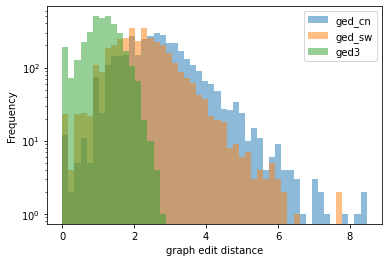

In [9]:
plt.close("all")

# df = df.query('ged1<=50 & ged2<50')

mean_std_statistics(df)
print(df[['ged_cn', 'ged_sw', 'ged3']].describe())
fig, ax = plt.subplots()
df[['ged_cn', 'ged_sw', 'ged3']].plot(ax=ax, kind="hist", alpha=0.5, bins=50)
ax.set_yscale('log')
ax.set_xlabel('graph edit distance')
plt.show()
fig = ax.get_figure()
fig.savefig('../log/ged_graph_shortest_path_distribution.pdf')

In [ ]:
#### test only ##### 
G = nx.path_graph(5)
print(G.nodes)
# print(nx.adjacency_matrix(G))

u=1
v=4 
path = nx.shortest_path(G, source=u, target=v)
G1 = nx.Graph()
nx.add_path(G1, path)
print(path)
print(G1.nodes)
# nx.draw(G, node_color='green')

In [45]:
import numpy as np 
df = pd.DataFrame(
    np.random.randint(0, 100, size=(10, 2)), columns=('A', 'DA'))

tmp = (df.groupby(df.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('±'.join, 1)))
print(tmp)

       A
0  16±98
1  69±13
2  31±43
3  80±13
4   6±82
5  56±23
6  21±12
7   0±98
8  79±31
9  42±18
